In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.utils import resample

def read_results(data_option):
    results = {}
    results['data']        = pd.read_csv(data_option+"_data.csv")
    results['rulsif']      = pd.read_csv(data_option+"_RuLSIF.csv")
    results['nn']          = pd.read_csv(data_option+"_NN.csv")
    results['gbdt']        = pd.read_csv(data_option+"_GBDT.csv")
    results['qda']         = pd.read_csv(data_option+"_QDA.csv")
    results['nn_rulsif']   = pd.read_csv(data_option+"_NN_RuLSIF.csv")
    results['gbdt_rulsif'] = pd.read_csv(data_option+"_GBDT_RuLSIF.csv")
    return results


def roc_auc_score_with_error(y_true, y_pred, n_iter):
    aucs = []
    for i in range(n_iter):
        y_true_res, y_pred_res = resample(y_true, y_pred)
        auc = roc_auc_score(y_true_res, y_pred_res)
        aucs.append(auc)
    mean = np.mean(aucs)
    std = np.std(aucs)
    return mean, std

# Dataset 1

In [3]:
data_option = "dataset1"
results1 = read_results(data_option)

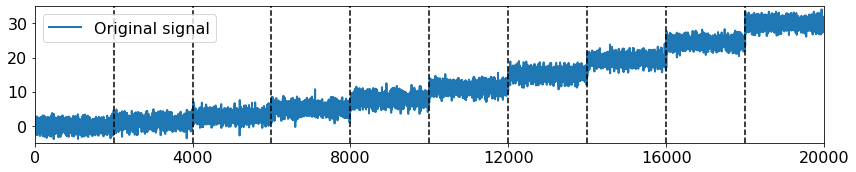

In [4]:
# Display test sample

T = results1['data']['T'].values
X = results1['data']['X0'].values

X = X[T<20000]
T = T[T<20000]

plt.figure(figsize=(12, 2.5))
plt.plot(T, X, linewidth=2, label='Original signal', color='C0')
for i in range(1, 10):
    plt.plot([i*2000]*2, [-5, 35], color='0', linestyle='--')
plt.ylim(-5, 35)
plt.xlim(0, 20000)

plt.xticks(np.arange(0, 20000+1, 4000), size=16)
plt.yticks(np.arange(0, 30+1, 10), size=16)

plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()
plt.savefig("plots/"+data_option+"_data.pdf", format='pdf')
plt.show()

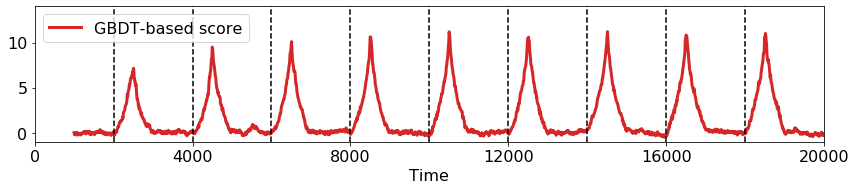

In [5]:
plt.figure(figsize=(12, 2.75))

for akey in ['gbdt']:

    T = results1[akey]['T'].values
    X = results1[akey]['Score'].values

    X = X[T<20000]
    T = T[T<20000]
    
    plt.plot(T, X, linewidth=3, label="GBDT-based score", color='C3')
    
# for akey in ['rulsif']:

#     T = results1[akey]['T'].values
#     X = results1[akey]['Score'].values

#     X = X[T<20000]
#     T = T[T<20000]
    
#     plt.plot(T, X*5, linewidth=3, label="RuLSIF-based score", color='C1')


for i in range(1, 10):
    plt.plot([i*2000]*2, [-1., 14], color='0', linestyle='--')

plt.ylim(-1., 14)
plt.xlim(0, 20000)

plt.xticks(np.arange(0, 20000+1, 4000), size=16)
plt.yticks(np.arange(0, 10+1, 5), size=16)

plt.xlabel("Time", size=16)

plt.legend(loc='upper left', fontsize=16)

plt.tight_layout()
plt.savefig("plots/"+data_option+"_"+akey+".pdf", format='pdf')
plt.show()

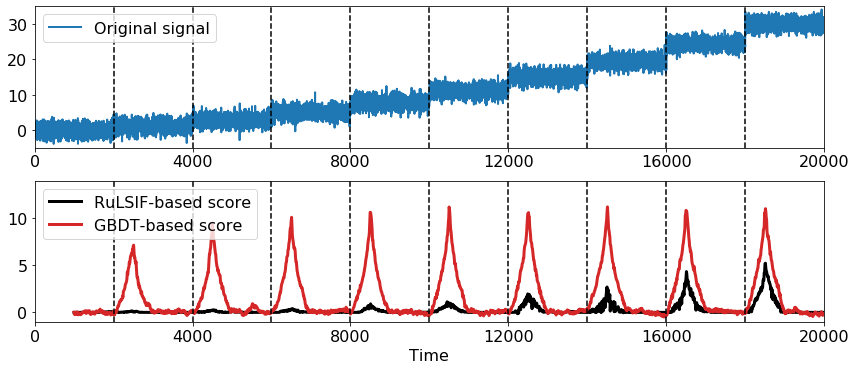

In [6]:
plt.figure(figsize=(12, 2*2.5+0.25))

plt.subplot(2, 1, 1)
T = results1['data']['T'].values
X = results1['data']['X0'].values
X = X[T<20000]
T = T[T<20000]
plt.plot(T, X, linewidth=2, label='Original signal', color='C0')
for i in range(1, 10):
    plt.plot([i*2000]*2, [-5, 35], color='0', linestyle='--')
plt.ylim(-5, 35)
plt.xlim(0, 20000)
plt.xticks(np.arange(0, 20000+1, 4000), size=16)
plt.yticks(np.arange(0, 30+1, 10), size=16)
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()


plt.subplot(2, 1, 2)
for akey in ['rulsif']:
    T = results1[akey]['T'].values
    X = results1[akey]['Score'].values
    X = X[T<20000]
    T = T[T<20000]
    plt.plot(T, X, linewidth=3, label="RuLSIF-based score", color='0')
for akey in ['gbdt']:
    T = results1[akey]['T'].values
    X = results1[akey]['Score'].values
    X = X[T<20000]
    T = T[T<20000]
    plt.plot(T, X, linewidth=3, label="GBDT-based score", color='C3')
for i in range(1, 10):
    plt.plot([i*2000]*2, [-1., 14], color='0', linestyle='--')
plt.ylim(-1., 14)
plt.xlim(0, 20000)
plt.xticks(np.arange(0, 20000+1, 4000), size=16)
plt.yticks(np.arange(0, 10+1, 5), size=16)
plt.xlabel("Time", size=16)
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()


plt.savefig("plots/"+data_option+"_"+akey+"_comb.pdf", format='pdf')
plt.show()

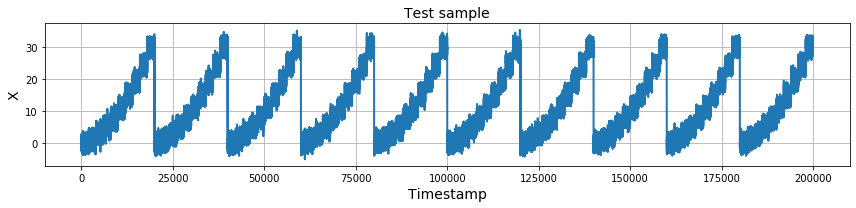

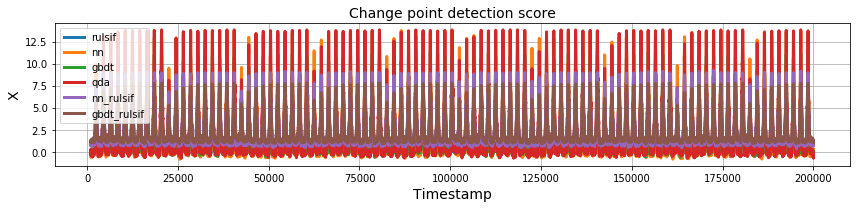

In [7]:
# Display test sample
plt.figure(figsize=(12, 3.))
plt.plot(results1['data']['T'], results1['data']['X0'], linewidth=2)
plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(b=1)
plt.title('Test sample', size=14)
plt.tight_layout()
plt.show()


# Display test sample
plt.figure(figsize=(12, 3.))
for akey in results1.keys():
    if akey == 'data': continue
    plt.plot(results1[akey]['T'], results1[akey]['Score'], linewidth=3, label=akey)

plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(b=1)
plt.title('Change point detection score', size=14)
plt.legend(loc='best')
plt.tight_layout()
#plt.ylim(-0.2, 10.)
plt.show()

rulsif: 0.867 +- 0.003
nn: 0.951 +- 0.002
gbdt: 0.959 +- 0.001
qda: 0.976 +- 0.001
nn_rulsif: 0.951 +- 0.002
gbdt_rulsif: 0.954 +- 0.001


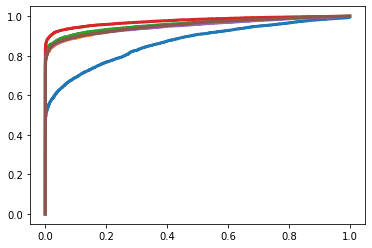

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score

for akey in results1.keys():
    if akey == 'data': continue
    fpr, tpr, _ = roc_curve(results1[akey]['S'], results1[akey]['Score'])
    plt.plot(fpr, tpr, label=akey, linewidth=3)
    auc_mean, auc_std = roc_auc_score_with_error(results1[akey]['S'], results1[akey]['Score'], 100)
    print(akey+": %.3f +- %.3f" % (auc_mean, auc_std))

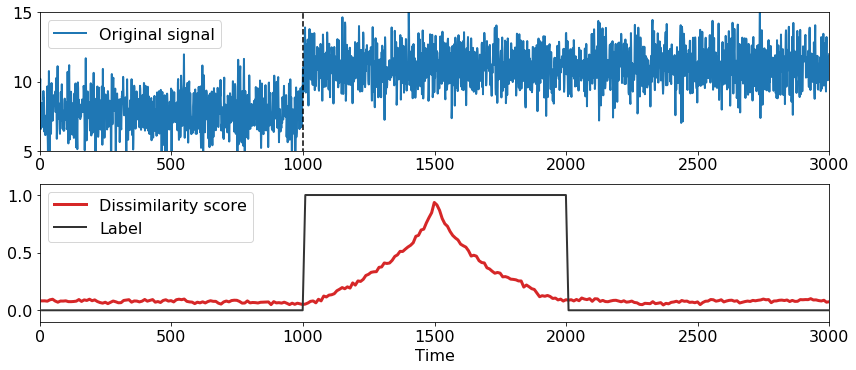

In [9]:
plt.figure(figsize=(12, 2*2.5+0.25))

plt.subplot(2, 1, 1)
T = results1['data']['T'].values
X = results1['data']['X0'].values
sel = (T>=9000) * (T<12000)
X = X[sel]
T = T[sel]
plt.plot(T-9000, X, linewidth=2, label='Original signal', color='C0')
plt.plot([1000]*2, [-5, 35], color='0', linestyle='--')
plt.ylim(5, 15)
plt.xlim(0, 3000)
plt.xticks(np.arange(0, 3000+1, 500), size=16)
plt.yticks(np.arange(5, 15+1, 5), size=16)
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()


plt.subplot(2, 1, 2)
for akey in ['gbdt']:
    T = results1[akey]['T'].values
    X = results1[akey]['Score'].values
    sel = (T>=9000) * (T<12000)
    X = X[sel]
    T = T[sel]
    S = np.zeros(len(T))
    S[(T >= 10000)*(T <11000)] = 1
    plt.plot(T-9000, X/13. + 0.075, linewidth=3, label="Dissimilarity score", color='C3')
    plt.plot(T-9000, S, linewidth=2, label="Label", color='0.2', linestyle='-')
#plt.plot([10000]*2, [-0.1, 1.1], color='0', linestyle='--')
plt.ylim(-0.1, 1.1)
plt.xlim(0, 3000)
plt.xticks(np.arange(0, 3000+1, 500), size=16)
plt.yticks(np.arange(-0., 1+0.1, 0.5), size=16)
plt.xlabel("Time", size=16)
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()


plt.savefig("plots/"+data_option+"_"+akey+"_example.pdf", format='pdf')
plt.show()

# Dataset 2

In [10]:
data_option2 = "dataset2"
results2 = read_results(data_option2)

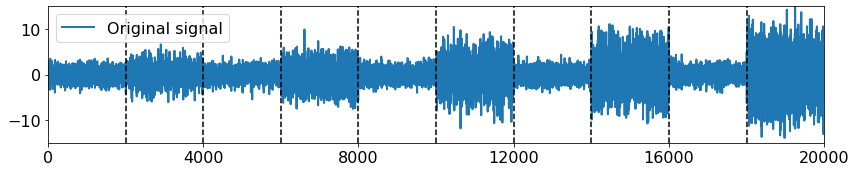

In [11]:
# Display test sample

T = results2['data']['T'].values
X = results2['data']['X0'].values

X = X[T<20000]
T = T[T<20000]

plt.figure(figsize=(12, 2.5))
plt.plot(T, X, linewidth=2, label='Original signal', color='C0')
for i in range(1, 10):
    plt.plot([i*2000]*2, [-15, 15], color='0', linestyle='--')
plt.ylim(-15, 15)
plt.xlim(0, 20000)

plt.xticks(np.arange(0, 20000+1, 4000), size=16)
plt.yticks(np.arange(-10, 15+1, 10), size=16)

plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()
plt.savefig("plots/"+data_option2+"_data.pdf", format='pdf')
plt.show()

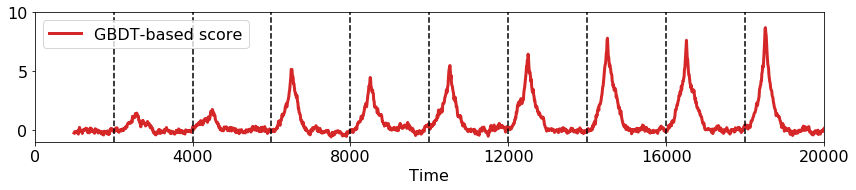

In [12]:
plt.figure(figsize=(12, 2.75))

for akey in ['gbdt']:

    T = results2[akey]['T'].values
    X = results2[akey]['Score'].values

    X = X[T<20000]
    T = T[T<20000]
    
    plt.plot(T, X, linewidth=3, label="GBDT-based score", color='C3')


for i in range(1, 10):
    plt.plot([i*2000]*2, [-1., 10], color='0', linestyle='--')

plt.ylim(-1., 10)
plt.xlim(0, 20000)

plt.xticks(np.arange(0, 20000+1, 4000), size=16)
plt.yticks(np.arange(0, 10+1, 5), size=16)

plt.xlabel("Time", size=16)

plt.legend(loc='upper left', fontsize=16)

plt.tight_layout()
plt.savefig("plots/"+data_option2+"_"+akey+".pdf", format='pdf')
plt.show()

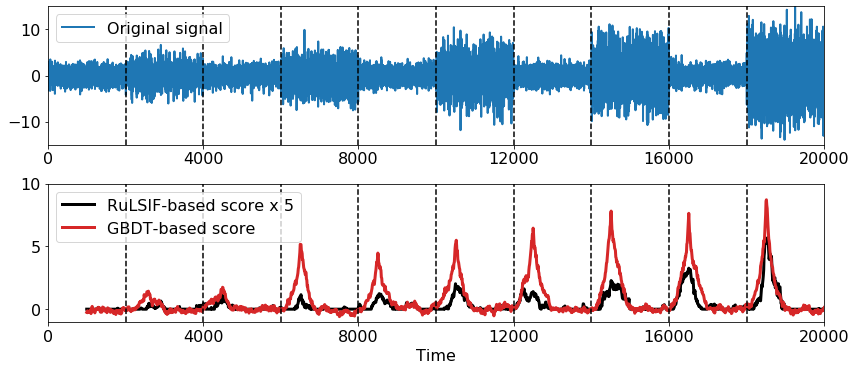

In [13]:
plt.figure(figsize=(12, 2*2.5+0.25))

plt.subplot(2, 1, 1)
T = results2['data']['T'].values
X = results2['data']['X0'].values
X = X[T<20000]
T = T[T<20000]
plt.plot(T, X, linewidth=2, label='Original signal', color='C0')
for i in range(1, 10):
    plt.plot([i*2000]*2, [-15, 15], color='0', linestyle='--')
plt.ylim(-15, 15)
plt.xlim(0, 20000)
plt.xticks(np.arange(0, 20000+1, 4000), size=16)
plt.yticks(np.arange(-10, 15+1, 10), size=16)
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()


plt.subplot(2, 1, 2)
for akey in ['rulsif']:
    T = results2[akey]['T'].values
    X = results2[akey]['Score'].values
    X = X[T<20000]
    T = T[T<20000]
    plt.plot(T, 5*X, linewidth=3, label="RuLSIF-based score x 5", color='0')
for akey in ['gbdt']:
    T = results2[akey]['T'].values
    X = results2[akey]['Score'].values
    X = X[T<20000]
    T = T[T<20000]
    plt.plot(T, X, linewidth=3, label="GBDT-based score", color='C3')
for i in range(1, 10):
    plt.plot([i*2000]*2, [-1., 10], color='0', linestyle='--')
plt.ylim(-1., 10)
plt.xlim(0, 20000)
plt.xticks(np.arange(0, 20000+1, 4000), size=16)
plt.yticks(np.arange(0, 10+1, 5), size=16)
plt.xlabel("Time", size=16)
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()


plt.savefig("plots/"+data_option2+"_"+akey+"_comb.pdf", format='pdf')
plt.show()

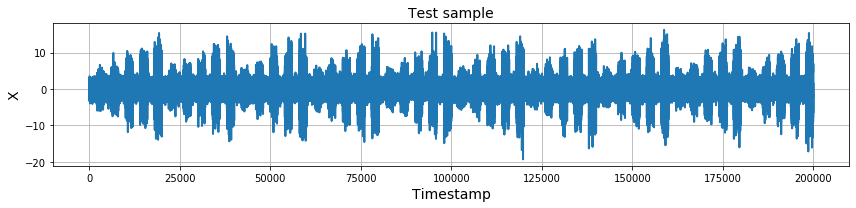

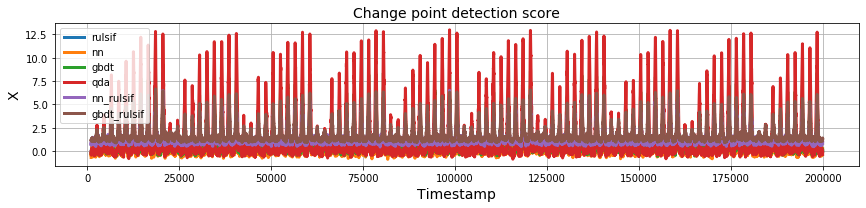

In [14]:
# Display test sample
plt.figure(figsize=(12, 3.))
plt.plot(results2['data']['T'], results2['data']['X0'], linewidth=2)
plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(b=1)
plt.title('Test sample', size=14)
plt.tight_layout()
plt.show()


# Display test sample
plt.figure(figsize=(12, 3.))
for akey in results2.keys():
    if akey == 'data': continue
    plt.plot(results2[akey]['T'], results2[akey]['Score'], linewidth=3, label=akey)

plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(b=1)
plt.title('Change point detection score', size=14)
plt.legend(loc='best')
plt.tight_layout()
#plt.ylim(-0.2, 10.)
plt.show()

rulsif: 0.761 +- 0.003
nn: 0.816 +- 0.003
gbdt: 0.894 +- 0.002
qda: 0.897 +- 0.002
nn_rulsif: 0.833 +- 0.003
gbdt_rulsif: 0.893 +- 0.002


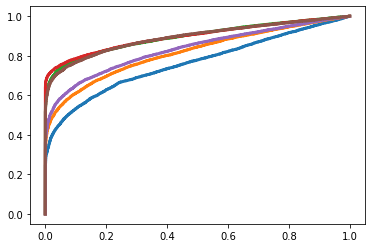

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

for akey in results2.keys():
    if akey == 'data': continue
    fpr, tpr, _ = roc_curve(results2[akey]['S'], results2[akey]['Score'])
    plt.plot(fpr, tpr, label=akey, linewidth=3)
    auc_mean, auc_std = roc_auc_score_with_error(results2[akey]['S'], results2[akey]['Score'], 100)
    print(akey+": %.3f +- %.3f" % (auc_mean, auc_std))

# Dataset 4

In [16]:
data_option4 = "dataset4"
results4 = read_results(data_option4)

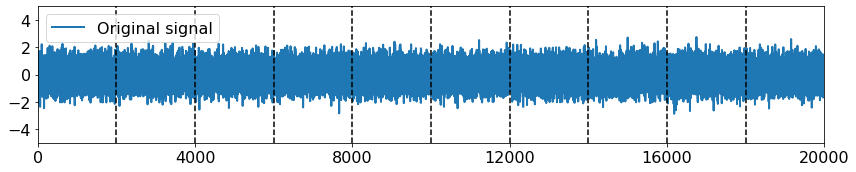

In [17]:
# Display test sample

T = results4['data']['T'].values
X = results4['data']['X0'].values

X = X[T<20000]
T = T[T<20000]

plt.figure(figsize=(12, 2.5))
plt.plot(T, X, linewidth=2, label='Original signal', color='C0')
for i in range(1, 10):
    plt.plot([i*2000]*2, [-5, 5], color='0', linestyle='--')
plt.ylim(-5, 5)
plt.xlim(0, 20000)

plt.xticks(np.arange(0, 20000+1, 4000), size=16)
plt.yticks(np.arange(-4, 4+1, 2), size=16)

plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()
plt.savefig("plots/"+data_option4+"_data.pdf", format='pdf')
plt.show()

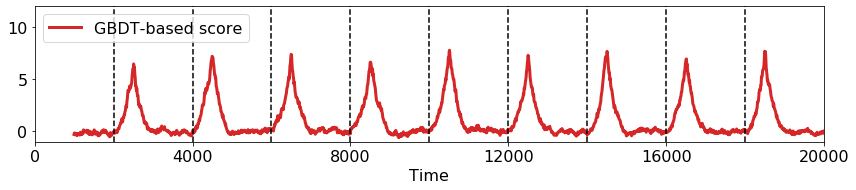

In [18]:
plt.figure(figsize=(12, 2.75))

for akey in ['gbdt']:

    T = results4[akey]['T'].values
    X = results4[akey]['Score'].values

    X = X[T<20000]
    T = T[T<20000]
    
    plt.plot(T, X, linewidth=3, label="GBDT-based score", color='C3')


for i in range(1, 10):
    plt.plot([i*2000]*2, [-1., 12], color='0', linestyle='--')

plt.ylim(-1., 12)
plt.xlim(0, 20000)

plt.xticks(np.arange(0, 20000+1, 4000), size=16)
plt.yticks(np.arange(0, 10+1, 5), size=16)

plt.xlabel("Time", size=16)

plt.legend(loc='upper left', fontsize=16)

plt.tight_layout()
plt.savefig("plots/"+data_option4+"_"+akey+".pdf", format='pdf')
plt.show()

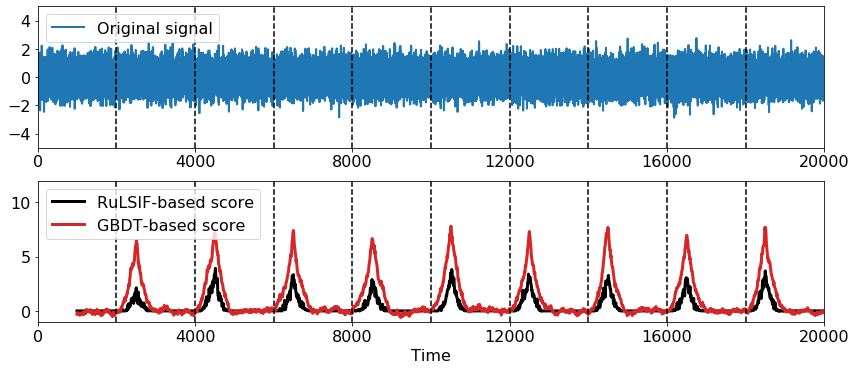

In [19]:
plt.figure(figsize=(12, 2*2.5+0.25))

plt.subplot(2, 1, 1)
T = results4['data']['T'].values
X = results4['data']['X0'].values
X = X[T<20000]
T = T[T<20000]
plt.plot(T, X, linewidth=2, label='Original signal', color='C0')
for i in range(1, 10):
    plt.plot([i*2000]*2, [-5, 5], color='0', linestyle='--')
plt.ylim(-5, 5)
plt.xlim(0, 20000)
plt.xticks(np.arange(0, 20000+1, 4000), size=16)
plt.yticks(np.arange(-4, 4+1, 2), size=16)
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()


plt.subplot(2, 1, 2)
for akey in ['rulsif']:
    T = results4[akey]['T'].values
    X = results4[akey]['Score'].values
    X = X[T<20000]
    T = T[T<20000]
    plt.plot(T, X, linewidth=3, label="RuLSIF-based score", color='0')
for akey in ['gbdt']:
    T = results4[akey]['T'].values
    X = results4[akey]['Score'].values
    X = X[T<20000]
    T = T[T<20000]
    plt.plot(T, X, linewidth=3, label="GBDT-based score", color='C3')
for i in range(1, 10):
    plt.plot([i*2000]*2, [-1., 12], color='0', linestyle='--')
plt.ylim(-1., 12)
plt.xlim(0, 20000)
plt.xticks(np.arange(0, 20000+1, 4000), size=16)
plt.yticks(np.arange(0, 10+1, 5), size=16)
plt.xlabel("Time", size=16)
plt.legend(loc='upper left', fontsize=16)
plt.tight_layout()


plt.savefig("plots/"+data_option4+"_"+akey+"_comb.pdf", format='pdf')
plt.show()

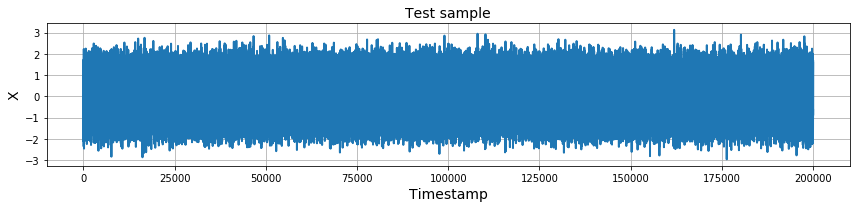

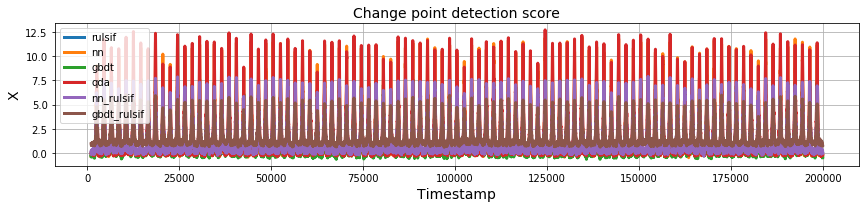

In [20]:
# Display test sample
plt.figure(figsize=(12, 3.))
plt.plot(results4['data']['T'], results4['data']['X0'], linewidth=2)
plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(b=1)
plt.title('Test sample', size=14)
plt.tight_layout()
plt.show()


# Display test sample
plt.figure(figsize=(12, 3.))
for akey in results4.keys():
    if akey == 'data': continue
    plt.plot(results4[akey]['T'], results4[akey]['Score'], linewidth=3, label=akey)

plt.xlabel('Timestamp', size=14)
plt.ylabel('X', size=14)
plt.grid(b=1)
plt.title('Change point detection score', size=14)
plt.legend(loc='best')
plt.tight_layout()
#plt.ylim(-0.2, 10.)
plt.show()

rulsif: 0.842 +- 0.003
nn: 0.933 +- 0.002
gbdt: 0.930 +- 0.002
qda: 0.970 +- 0.001
nn_rulsif: 0.941 +- 0.002
gbdt_rulsif: 0.919 +- 0.002


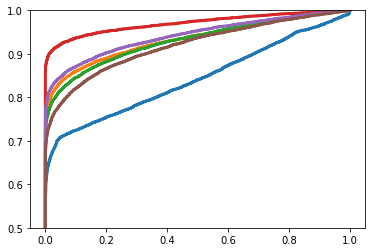

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

for akey in results4.keys():
    if akey == 'data': continue
    fpr, tpr, _ = roc_curve(results4[akey]['S'], results4[akey]['Score'])
    plt.plot(fpr, tpr, label=akey, linewidth=3)
    plt.ylim(0.5, 1)
    auc_mean, auc_std = roc_auc_score_with_error(results4[akey]['S'], results4[akey]['Score'], 100)
    print(akey+": %.3f +- %.3f" % (auc_mean, auc_std))

# Kepler

In [22]:
data_option = ["kepler_2617", "kepler_2619", "kepler_2620", 
               "kepler_5622", "kepler_5624", "kepler_5625", "kepler_5626", 
               "kepler_9610"]
result_list = []
for opt in data_option:
    res = read_results(opt)
    result_list.append(res)
    
T_change_2617 = [5840, 6150, 13015, 13320, 20187, 20512, 27356, 27677, 34531, 34838, 41707, 42015]
T_change = [T_change_2617]

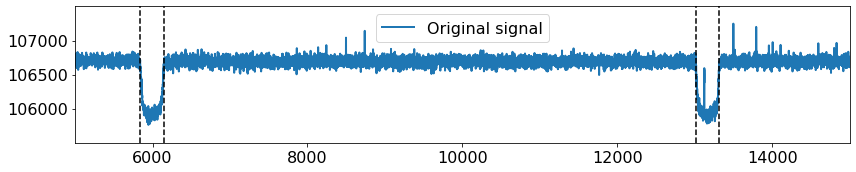

In [23]:
# Display test sample

T = result_list[0]['data']['T'].values
X = result_list[0]['data']['X0'].values

sel = (T >= 5000) * (T < 15000)
X = X[sel]
T = T[sel]

plt.figure(figsize=(12, 2.5))
plt.plot(T, X, linewidth=2, label='Original signal', color='C0')
for i in T_change[0]:
    plt.plot([i]*2, [105500, 107500], color='0', linestyle='--')
plt.ylim(105500, 107500)
plt.xlim(5000, 15000)

plt.xticks(np.arange(6000, 15000+1, 2000), size=16)
plt.yticks(np.arange(106000, 107000+1, 500), size=16)

plt.legend(loc='upper center', fontsize=16)
plt.tight_layout()
plt.savefig("plots/"+data_option[0]+"_data.pdf", format='pdf')
plt.show()

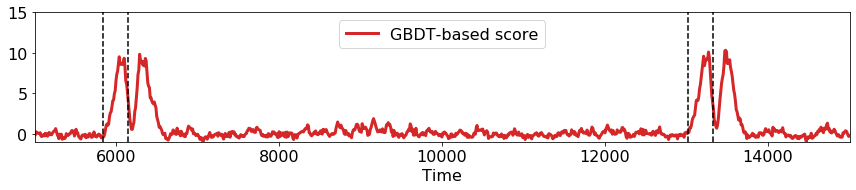

In [24]:
plt.figure(figsize=(12, 2.75))

for akey in ['gbdt']:

    T = result_list[0][akey]['T'].values
    X = result_list[0][akey]['Score'].values

    sel = (T >= 5000) * (T < 15000)
    X = X[sel]
    T = T[sel]
    
    plt.plot(T, X, linewidth=3, label="GBDT-based score", color='C3')


for i in T_change[0]:
    plt.plot([i]*2, [-1., 15], color='0', linestyle='--')

plt.ylim(-1., 15)
plt.xlim(5000, 15000)

plt.xticks(np.arange(6000, 15000+1, 2000), size=16)
plt.yticks(np.arange(0, 15+1, 5), size=16)

plt.xlabel("Time", size=16)

plt.legend(loc='upper center', fontsize=16)

plt.tight_layout()
plt.savefig("plots/"+data_option[0]+"_"+akey+".pdf", format='pdf')
plt.show()

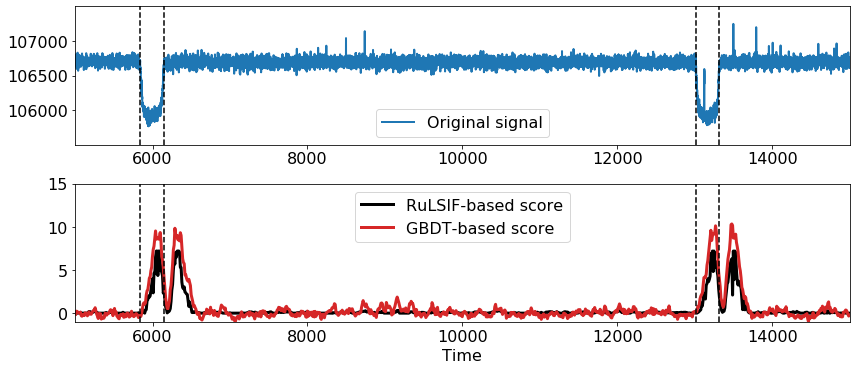

In [25]:
plt.figure(figsize=(12, 2*2.5+0.25))

plt.subplot(2, 1, 1)
T = result_list[0]['data']['T'].values
X = result_list[0]['data']['X0'].values
sel = (T >= 5000) * (T < 15000)
X = X[sel]
T = T[sel]
plt.plot(T, X, linewidth=2, label='Original signal', color='C0')
for i in T_change[0]:
    plt.plot([i]*2, [105500, 107500], color='0', linestyle='--')
plt.ylim(105500, 107500)
plt.xlim(5000, 15000)
plt.xticks(np.arange(6000, 15000+1, 2000), size=16)
plt.yticks(np.arange(106000, 107000+1, 500), size=16)
plt.legend(loc='lower center', fontsize=16)
plt.tight_layout()


plt.subplot(2, 1, 2)
for akey in ['rulsif']:
    T = result_list[0][akey]['T'].values
    X = result_list[0][akey]['Score'].values
    sel = (T >= 5000) * (T < 15000)
    X = X[sel]
    T = T[sel]
    X[X < -1] = X.max()
    plt.plot(T, X, linewidth=3, label="RuLSIF-based score", color='0')
for akey in ['gbdt']:
    T = result_list[0][akey]['T'].values
    X = result_list[0][akey]['Score'].values
    sel = (T >= 5000) * (T < 15000)
    X = X[sel]
    T = T[sel]
    plt.plot(T, X, linewidth=3, label="GBDT-based score", color='C3')
for i in T_change[0]:
    plt.plot([i]*2, [-1., 15], color='0', linestyle='--')
plt.ylim(-1., 15)
plt.xlim(5000, 15000)
plt.xticks(np.arange(6000, 15000+1, 2000), size=16)
plt.yticks(np.arange(0, 15+1, 5), size=16)
plt.xlabel("Time", size=16)
plt.legend(loc='upper center', fontsize=16)
plt.tight_layout()


plt.savefig("plots/"+data_option[0]+"_"+akey+"_comb.pdf", format='pdf')
plt.show()

rulsif: 0.845 +- 0.004
nn: 0.943 +- 0.002
gbdt: 0.950 +- 0.002
qda: 0.959 +- 0.002
nn_rulsif: 0.826 +- 0.004
gbdt_rulsif: 0.940 +- 0.002


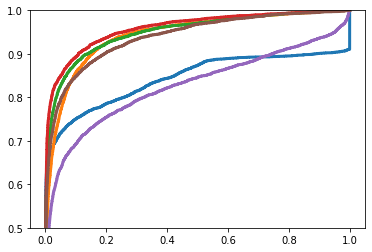

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

for akey in result_list[0].keys():
    if akey == 'data': continue
    y_true = []
    y_pred = []
    for res in result_list:
        y_true += list(res[akey]['S'].values)
        y_pred += list(res[akey]['Score'].values)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label=akey, linewidth=3)
    plt.ylim(0.5, 1)
    auc_mean, auc_std = roc_auc_score_with_error(y_true, y_pred, 100)
    print(akey+": %.3f +- %.3f" % (auc_mean, auc_std))

# IRIS

In [27]:
data_option = ["iris_0noise", "iris_1noise", "iris_2noise", "iris_3noise", 
               "iris_4noise", "iris_5noise", "iris_6noise", "iris_7noise", 
               "iris_8noise", "iris_9noise", "iris_10noise",  
               "iris_12noise", "iris_13noise"]
result_list = []
for opt in data_option:
    res = read_results(opt)
    result_list.append(res)
    
T_change_4 = [8223]
T_change = [T_change_4]

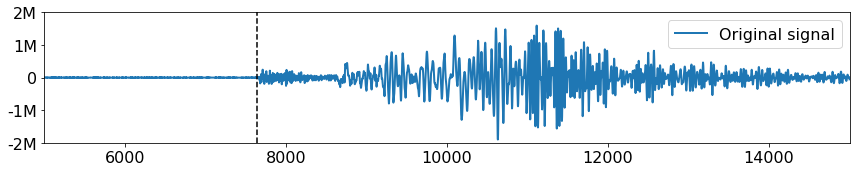

In [28]:
# Display test sample

num = 5 # 5, 7, 8, 

T = result_list[num]['data']['T'].values
X = result_list[num]['data']['X0'].values

sel = (T >= 5000) * (T < 15000)
X = X[sel]
T = T[sel]

plt.figure(figsize=(12, 2.5))
plt.plot(T, X, linewidth=2, label='Original signal', color='C0')
plt.plot([7647]*2, [-2*10**6, 2*10**6], color='0', linestyle='--')
plt.ylim(-2*10**6, 2*10**6)
plt.xlim(5000, 15000)

plt.xticks(np.arange(6000, 15000+1, 2000), size=16)
plt.yticks(np.arange(-2*10**6, 2*10**6+1, 10**6), ['-2M', '-1M', '0', '1M', '2M'], size=16)

plt.legend(loc='upper right', fontsize=16)
plt.tight_layout()
plt.savefig("plots/"+data_option[num]+"_data.pdf", format='pdf')
plt.show()

In [29]:
# import plotly.express as px

# fig = px.line(x=T, y=X)
# fig.show()

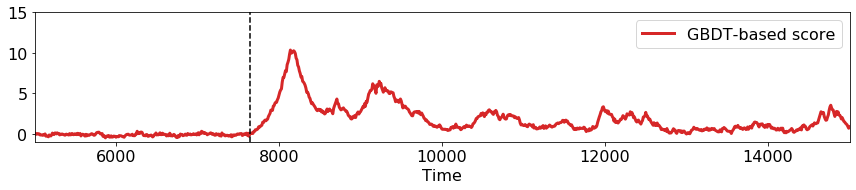

In [30]:
plt.figure(figsize=(12, 2.75))

for akey in ['gbdt']:
    T = result_list[num][akey]['T'].values
    X = result_list[num][akey]['Score'].values
    sel = (T >= 5000) * (T < 15000)
    X = X[sel]
    T = T[sel]
    plt.plot(T, X, linewidth=3, label="GBDT-based score", color='C3')
    plt.plot([7647]*2, [-1., 15], color='0', linestyle='--')

plt.ylim(-1., 15)
plt.xlim(5000, 15000)

plt.xticks(np.arange(6000, 15000+1, 2000), size=16)
plt.yticks(np.arange(0, 15+1, 5), size=16)

plt.xlabel("Time", size=16)

plt.legend(loc='upper right', fontsize=16)

plt.tight_layout()
plt.savefig("plots/"+data_option[num]+"_"+akey+".pdf", format='pdf')
plt.show()

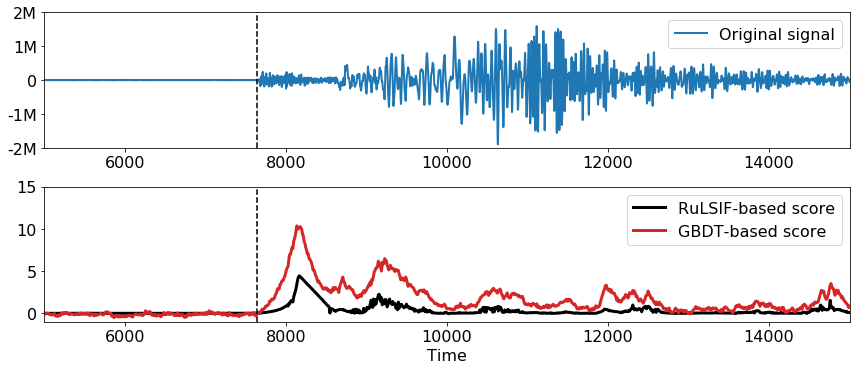

In [31]:
num = 5 # 5, 7, 8, 

T = result_list[num]['data']['T'].values
X = result_list[num]['data']['X0'].values

sel = (T >= 5000) * (T < 15000)
X = X[sel]
T = T[sel]

plt.figure(figsize=(12, 2*2.5+0.25))

plt.subplot(2, 1, 1)
plt.plot(T, X, linewidth=2, label='Original signal', color='C0')
plt.plot([7647]*2, [-2*10**6, 2*10**6], color='0', linestyle='--')
plt.ylim(-2*10**6, 2*10**6)
plt.xlim(5000, 15000)
plt.xticks(np.arange(6000, 15000+1, 2000), size=16)
plt.yticks(np.arange(-2*10**6, 2*10**6+1, 10**6), ['-2M', '-1M', '0', '1M', '2M'], size=16)
plt.legend(loc='upper right', fontsize=16)
plt.tight_layout()


plt.subplot(2, 1, 2)
for akey in ['rulsif']:
    T = result_list[num][akey]['T'].values
    X = result_list[num][akey]['Score'].values
    sel = (T >= 5000) * (T < 15000)
    X = X[sel]
    T = T[sel]
    plt.plot(T, 1*X, linewidth=3, label="RuLSIF-based score", color='0')
for akey in ['gbdt']:
    T = result_list[num][akey]['T'].values
    X = result_list[num][akey]['Score'].values
    sel = (T >= 5000) * (T < 15000)
    X = X[sel]
    T = T[sel]
    plt.plot(T, X, linewidth=3, label="GBDT-based score", color='C3')
    plt.plot([7647]*2, [-1., 15], color='0', linestyle='--')
plt.ylim(-1., 15)
plt.xlim(5000, 15000)
plt.xticks(np.arange(6000, 15000+1, 2000), size=16)
plt.yticks(np.arange(0, 15+1, 5), size=16)
plt.xlabel("Time", size=16)
plt.legend(loc='upper right', fontsize=16)
plt.tight_layout()


plt.savefig("plots/"+data_option[num]+"_comb.pdf", format='pdf')
plt.show()

rulsif: 0.971 +- 0.004
nn: 0.972 +- 0.004
gbdt: 0.979 +- 0.003
qda: 0.990 +- 0.002
nn_rulsif: 0.942 +- 0.005
gbdt_rulsif: 0.979 +- 0.003


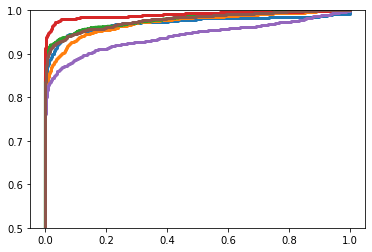

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

for akey in result_list[0].keys():
    if akey == 'data': continue
    y_true = []
    y_pred = []
    for res in result_list:
        y_t = res[akey]['S'].values
        y_p = res[akey]['Score'].values
        indx = np.arange(len(y_t))
        i_max = indx[np.array(y_t) == 1][0]+100
        #i_max = indx.max()
        #print(i_max, indx.max())
        y_t = y_t[indx <= i_max]
        y_p = y_p[indx <= i_max]
        
        
        y_true += list(y_t)
        y_pred += list(y_p)
    
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, label=akey, linewidth=3)
    plt.ylim(0.5, 1)
    auc_mean, auc_std = roc_auc_score_with_error(y_true, y_pred, 100)
    print(akey+": %.3f +- %.3f" % (auc_mean, auc_std))